In [138]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import xml.etree.ElementTree as et

from sklearn.model_selection import train_test_split 

import shutil as sh

import gc

In [100]:
images_folder = os.path.join("dataset_kaggle","images")
annotations_folder = os.path.join("dataset_kaggle","annotations")

images_count = len(os.listdir(images_folder))
annotations_count = len(os.listdir(images_folder))

print(f"images: {images_count}")
print(f"annotations: {annotations_count}")

images_paths = []
annotations_paths = []

for i in range(images_count):
    images_paths.append(os.path.join(images_folder,f"Cars{i}.png"))
    annotations_paths.append(os.path.join(annotations_folder,f"Cars{i}.xml"))

images: 433
annotations: 433


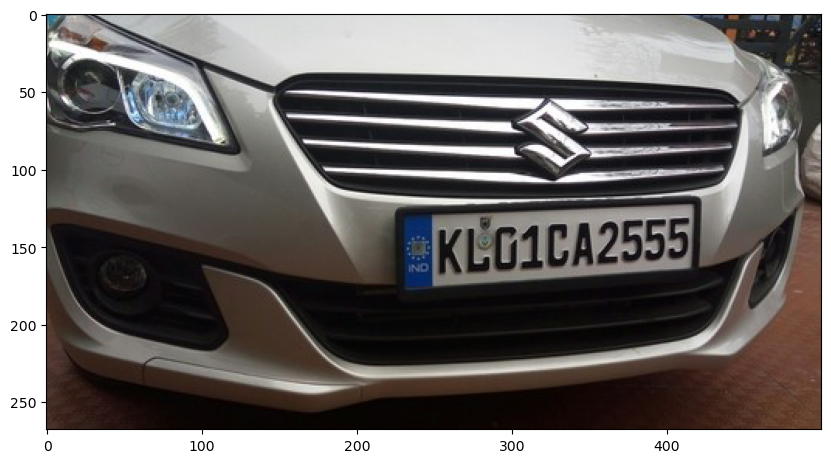

In [101]:
img = plt.imread(images_paths[0])
fig, ax = plt.subplots(figsize=(10,8))
ax.imshow(img)

In [102]:
with open(annotations_paths[400]) as a:
    print(a.read())


<annotation>
    <folder>images</folder>
    <filename>Cars400.png</filename>
    <size>
        <width>400</width>
        <height>267</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>licence</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>303</xmin>
            <ymin>191</ymin>
            <xmax>340</xmax>
            <ymax>217</ymax>
        </bndbox>
    </object>
</annotation>


In [103]:
df_cols = ["img_id","image_width","image_height","bbox_xmin","bbox_ymin","bbox_xmax","bbox_ymax"]
df_rows = []

for annot_path in annotations_paths:
    xroot = et.parse(annot_path).getroot()
    xsize = xroot.find("size")

    i = xroot.find("filename").text[4::].replace(".png","")
    print(i)
    image_width = xsize.find("width").text
    image_height = xsize.find("height").text

    xbbox = xroot.find("object").find("bndbox")

    for obj in xroot.findall("object"):
        bbox = obj.find("bndbox")
        bbox_xmin = bbox.find("xmin").text
        bbox_ymin = bbox.find("ymin").text
        bbox_xmax = bbox.find("xmax").text
        bbox_ymax = bbox.find("ymax").text

        df_rows.append({"img_id": i, "image_width": image_width, "image_height":image_height,
                "bbox_xmin": bbox_xmin, "bbox_ymin": bbox_ymin,
                "bbox_xmax": bbox_xmax, "bbox_ymax": bbox_ymax})
    
    del xroot, xsize,xbbox, i,image_width,image_height,bbox_xmax,bbox_xmin,bbox_ymax,bbox_ymin
    gc.collect()

df = pd.DataFrame(df_rows, columns=df_cols)
df.tail()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

,img_id,image_width,image_height,bbox_xmin,bbox_ymin,bbox_xmax,bbox_ymax
466,428,400,225,142,128,258,157
467,429,301,400,86,166,208,195
468,430,400,225,38,159,116,197
469,431,400,192,55,82,343,147
470,432,467,300,95,258,196,284


In [104]:
print(df.shape,df['id'].nunique())

KeyError: 'id'

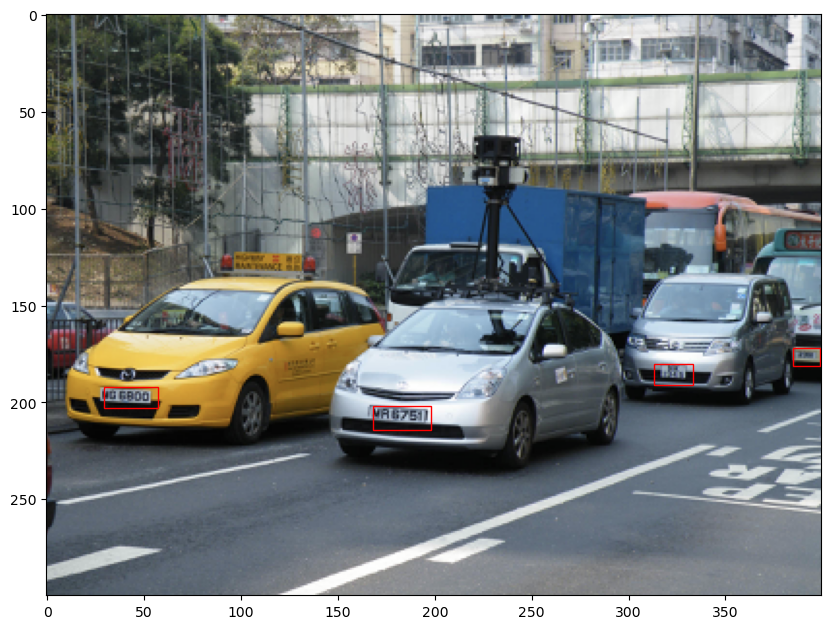

In [105]:
img_id = 330
img = plt.imread(images_paths[img_id])
fig, ax = plt.subplots(figsize=(10,8))
ax.imshow(img)

df_ids = df[df['img_id'] == str(img_id)].index
for i in range(len(df_ids)):
    ax.add_patch(patches.Rectangle(
        (int(df.loc[df_ids[i], 'bbox_xmin']), int(df.loc[df_ids[i], 'bbox_ymin'])), 
        int(df.loc[df_ids[i], 'bbox_xmax']) - int(df.loc[df_ids[i], 'bbox_xmin']), 
        int(df.loc[df_ids[i], 'bbox_ymax']) - int(df.loc[df_ids[i], 'bbox_ymin']), 
        linewidth=1, 
        edgecolor='r', 
        facecolor='none' 
    ))

In [161]:
data_path = "dataset/"

labels_path = os.path.join(data_path, "labels")
imgs_path = os.path.join(data_path, "images")

train_images_path = os.path.join(imgs_path, "train")
val_images_path = os.path.join(imgs_path, "val")
train_labels_path = os.path.join(labels_path, "train")
val_labels_path = os.path.join(labels_path, "val")

data_configuration_path = os.path.join(data_path, "dataset.yaml")
if not os.path.exists(data_path):
    os.makedirs(data_path)
if not os.path.exists(train_images_path):
    os.makedirs(train_images_path)
if not os.path.exists(train_labels_path):
    os.makedirs(train_labels_path)
if not os.path.exists(val_images_path):
    os.makedirs(val_images_path)
if not os.path.exists(val_labels_path):
    os.makedirs(val_labels_path)

print(train_images_path)
print(val_images_path)
print(train_labels_path)
print(val_labels_path)
print(data_configuration_path)

with open(data_configuration_path, 'w') as f:
    f.write(f'''
path: /kaggle/working/dataset
train: images/train
val: images/val
test:
names: 
    0: license
''')


dataset/images/train
dataset/images/val
dataset/labels/train
dataset/labels/val
dataset/dataset.yaml


In [162]:
new_df = df.copy(deep=True)
new_df

,img_id,image_width,image_height,bbox_xmin,bbox_ymin,bbox_xmax,bbox_ymax
0,0,500,268,226,125,419,173
1,1,400,248,134,128,262,160
2,2,400,400,229,176,270,193
3,3,400,225,142,128,261,157
4,4,590,350,156,82,503,253
...,...,...,...,...,...,...,...
466,428,400,225,142,128,258,157
467,429,301,400,86,166,208,195
468,430,400,225,38,159,116,197
469,431,400,192,55,82,343,147


In [163]:
xcenter=[]
ycenter=[]
bboxwidth=[]
bboxheight=[]

lic_column = []

for i in range(len(new_df)):
    xcenter.append(
    (float(new_df.loc[i,'bbox_xmin']) + float(new_df.loc[i,'bbox_xmax'])) / (2 * float(new_df.loc[i,'image_width']))
    )
    ycenter.append(
    (float(new_df.loc[i,'bbox_ymin']) + float(new_df.loc[i,'bbox_ymax'])) / (2 * float(new_df.loc[i,'image_height']))
    )
    bboxwidth.append(
    (float(new_df.loc[i,'bbox_xmax']) - float(new_df.loc[i,'bbox_xmin'])) / float(new_df.loc[i,'image_width'])
    )
    bboxheight.append(
    (float(new_df.loc[i,'bbox_ymax']) - float(new_df.loc[i,'bbox_ymin'])) / float(new_df.loc[i,'image_height'])
    )
    lic_column.append(0)

new_df['class'] = lic_column

new_df['bbox_width'] = bboxwidth
new_df['bbox_height'] = bboxheight

new_df["x_center"]= xcenter
new_df["y_center"]= ycenter

new_df

,img_id,image_width,image_height,bbox_xmin,bbox_ymin,bbox_xmax,bbox_ymax,class,bbox_width,bbox_height,x_center,y_center
0,0,500,268,226,125,419,173,0,0.386000,0.179104,0.645000,0.555970
1,1,400,248,134,128,262,160,0,0.320000,0.129032,0.495000,0.580645
2,2,400,400,229,176,270,193,0,0.102500,0.042500,0.623750,0.461250
3,3,400,225,142,128,261,157,0,0.297500,0.128889,0.503750,0.633333
4,4,590,350,156,82,503,253,0,0.588136,0.488571,0.558475,0.478571
...,...,...,...,...,...,...,...,...,...,...,...,...
466,428,400,225,142,128,258,157,0,0.290000,0.128889,0.500000,0.633333
467,429,301,400,86,166,208,195,0,0.405316,0.072500,0.488372,0.451250
468,430,400,225,38,159,116,197,0,0.195000,0.168889,0.192500,0.791111
469,431,400,192,55,82,343,147,0,0.720000,0.338542,0.497500,0.596354


In [164]:
image_ids = list(set(df['img_id']))

train_ids, val_ids = train_test_split(image_ids, random_state=42, test_size=0.1)

print('Train shape: {}'.format(len(train_ids)))
print('Validation shape: {}'.format(len(val_ids)))

Train shape: 389
Validation shape: 44


In [ ]:
for id, mini in new_df.groupby('img_id'):
    if id in val_ids:
        path2save = 'val'
    else:
        path2save = 'train'

    new_annotation_path = os.path.join(labels_path, path2save, "Cars" + id + ".txt")
    
    with open(new_annotation_path, 'w+') as f:
        row = mini[['class','x_center','y_center','bbox_width','bbox_height']].astype(float).values
        row = row.astype('str')

        for j in range(len(row)):
            text = ' '.join(row[j])
            f.write(text)
            f.write("\n")
    sh.copy(
        os.path.join(images_folder, "Cars" + id + ".png"),
        os.path.join(imgs_path, path2save, "Cars" + id + ".png")
    )

In [166]:
print(len(os.listdir(train_labels_path)) == len(os.listdir(train_images_path)))
print(len(os.listdir(val_labels_path)) == len(os.listdir(val_images_path)))

True
True
